## simple linear regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('tvmarketing.csv')
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [5]:
#extract dependent and independent variable
x=np.array(data['TV'])
y=np.array(data['Sales'])

In [6]:
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

In [7]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#y_scaled=scaler.fit_transform(y)

In [8]:
x.shape

(200, 1)

In [9]:
y.shape

(200, 1)

In [10]:
type(x)

numpy.ndarray

In [11]:
len(x)

200

In [12]:
x_scaled.shape

(200, 1)

In [14]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

In [15]:
#fitting simple linear regression model to the training dataset
from sklearn.linear_model import LinearRegression
simple_lr=LinearRegression()
simple_lr.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=simple_lr.predict(x_test)
x_pred=simple_lr.predict(x_train)

In [17]:
#finding mse and r2_score
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

In [18]:
print(mse)
print(r2_score*100)

9.723404553036378
59.49977850121936


In [19]:
# this mse =13 means that this model is not able to match the 13 percent of the values
# r2 means that your model is 65.9% is accurate on test data .

Text(0, 0.5, 'Sales')

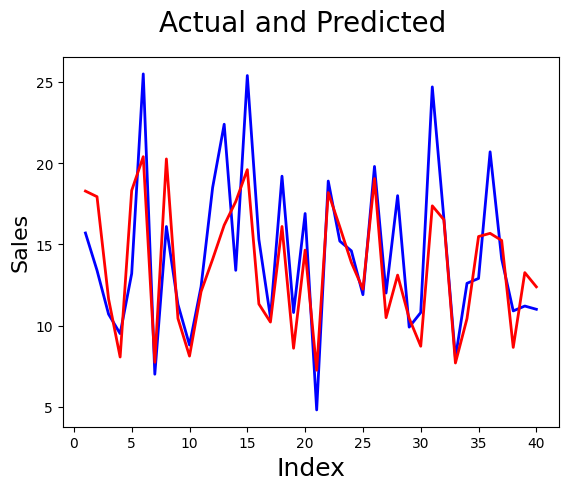

In [20]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,41,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('Sales', fontsize=16) 

Text(0, 0.5, 'ytest-ypred')

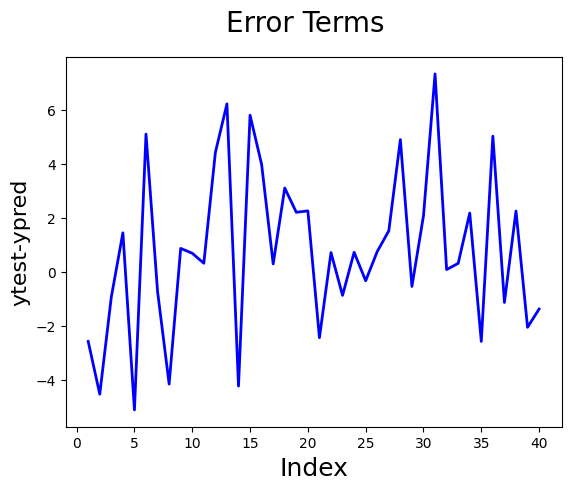

In [21]:
# Error terms
c = [i for i in range(1,41,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)       
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)

In [22]:
y_test

array([[15.7],
       [13.4],
       [10.7],
       [ 9.5],
       [13.2],
       [25.5],
       [ 7. ],
       [16.1],
       [11.3],
       [ 8.8],
       [12.4],
       [18.5],
       [22.4],
       [13.4],
       [25.4],
       [15.3],
       [10.5],
       [19.2],
       [10.8],
       [16.9],
       [ 4.8],
       [18.9],
       [15.2],
       [14.6],
       [11.9],
       [19.8],
       [12. ],
       [18. ],
       [ 9.9],
       [10.8],
       [24.7],
       [16.6],
       [ 8. ],
       [12.6],
       [12.9],
       [20.7],
       [14.1],
       [10.9],
       [11.2],
       [11. ]])

In [23]:
y_pred

array([[18.28195628],
       [17.93752382],
       [11.63728004],
       [ 8.05900947],
       [18.32022655],
       [20.40117267],
       [ 7.73371215],
       [20.26244293],
       [10.43655021],
       [ 8.11641488],
       [12.08695576],
       [14.08179376],
       [16.18187502],
       [17.63614541],
       [19.60228071],
       [11.32633407],
       [10.21171236],
       [16.10055069],
       [ 8.59957708],
       [14.6462803 ],
       [ 7.24576616],
       [18.19106438],
       [16.07663177],
       [13.88087483],
       [12.23525307],
       [19.05214553],
       [10.48438805],
       [13.10590179],
       [10.44611778],
       [ 8.72395547],
       [17.37303728],
       [16.5215237 ],
       [ 7.69065809],
       [10.42698264],
       [15.48344253],
       [15.67957768],
       [15.23946954],
       [ 8.65219871],
       [13.25898288],
       [12.38355038]])

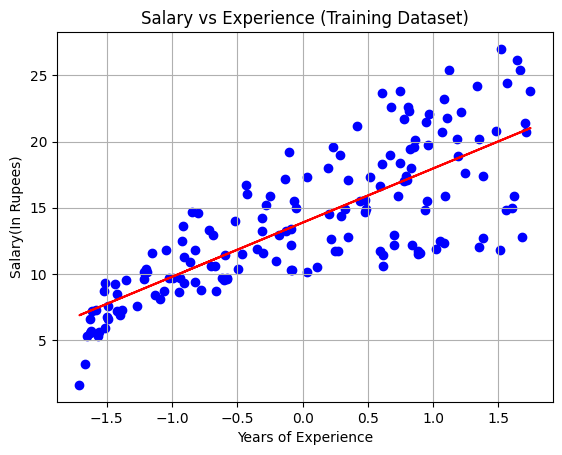

In [24]:
plt.scatter(x_train,y_train,c='blue')
plt.plot(x_train,x_pred,c='red')
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)") 
plt.grid()